# Práctica Final: Clasificación de Documentos con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación de documentos. El objetivo es construir un modelo capaz de clasificar automáticamente documentos en categorías predefinidas.

Pasos a seguir:

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

##**Librerias**##


In [1]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packa

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

##**Exploración y análisis de Datos con Scikit-Learn**##





Descarga del dataset y creación del Dataframe.

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.shape

(569, 31)

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Se revisan los tipo de datos que contienen el dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Se comprueba que no hay datos NaN.

In [8]:
print("\nCantidad de valores NaN en cada columna:")
print(df.isna().sum())


Cantidad de valores NaN en cada columna:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


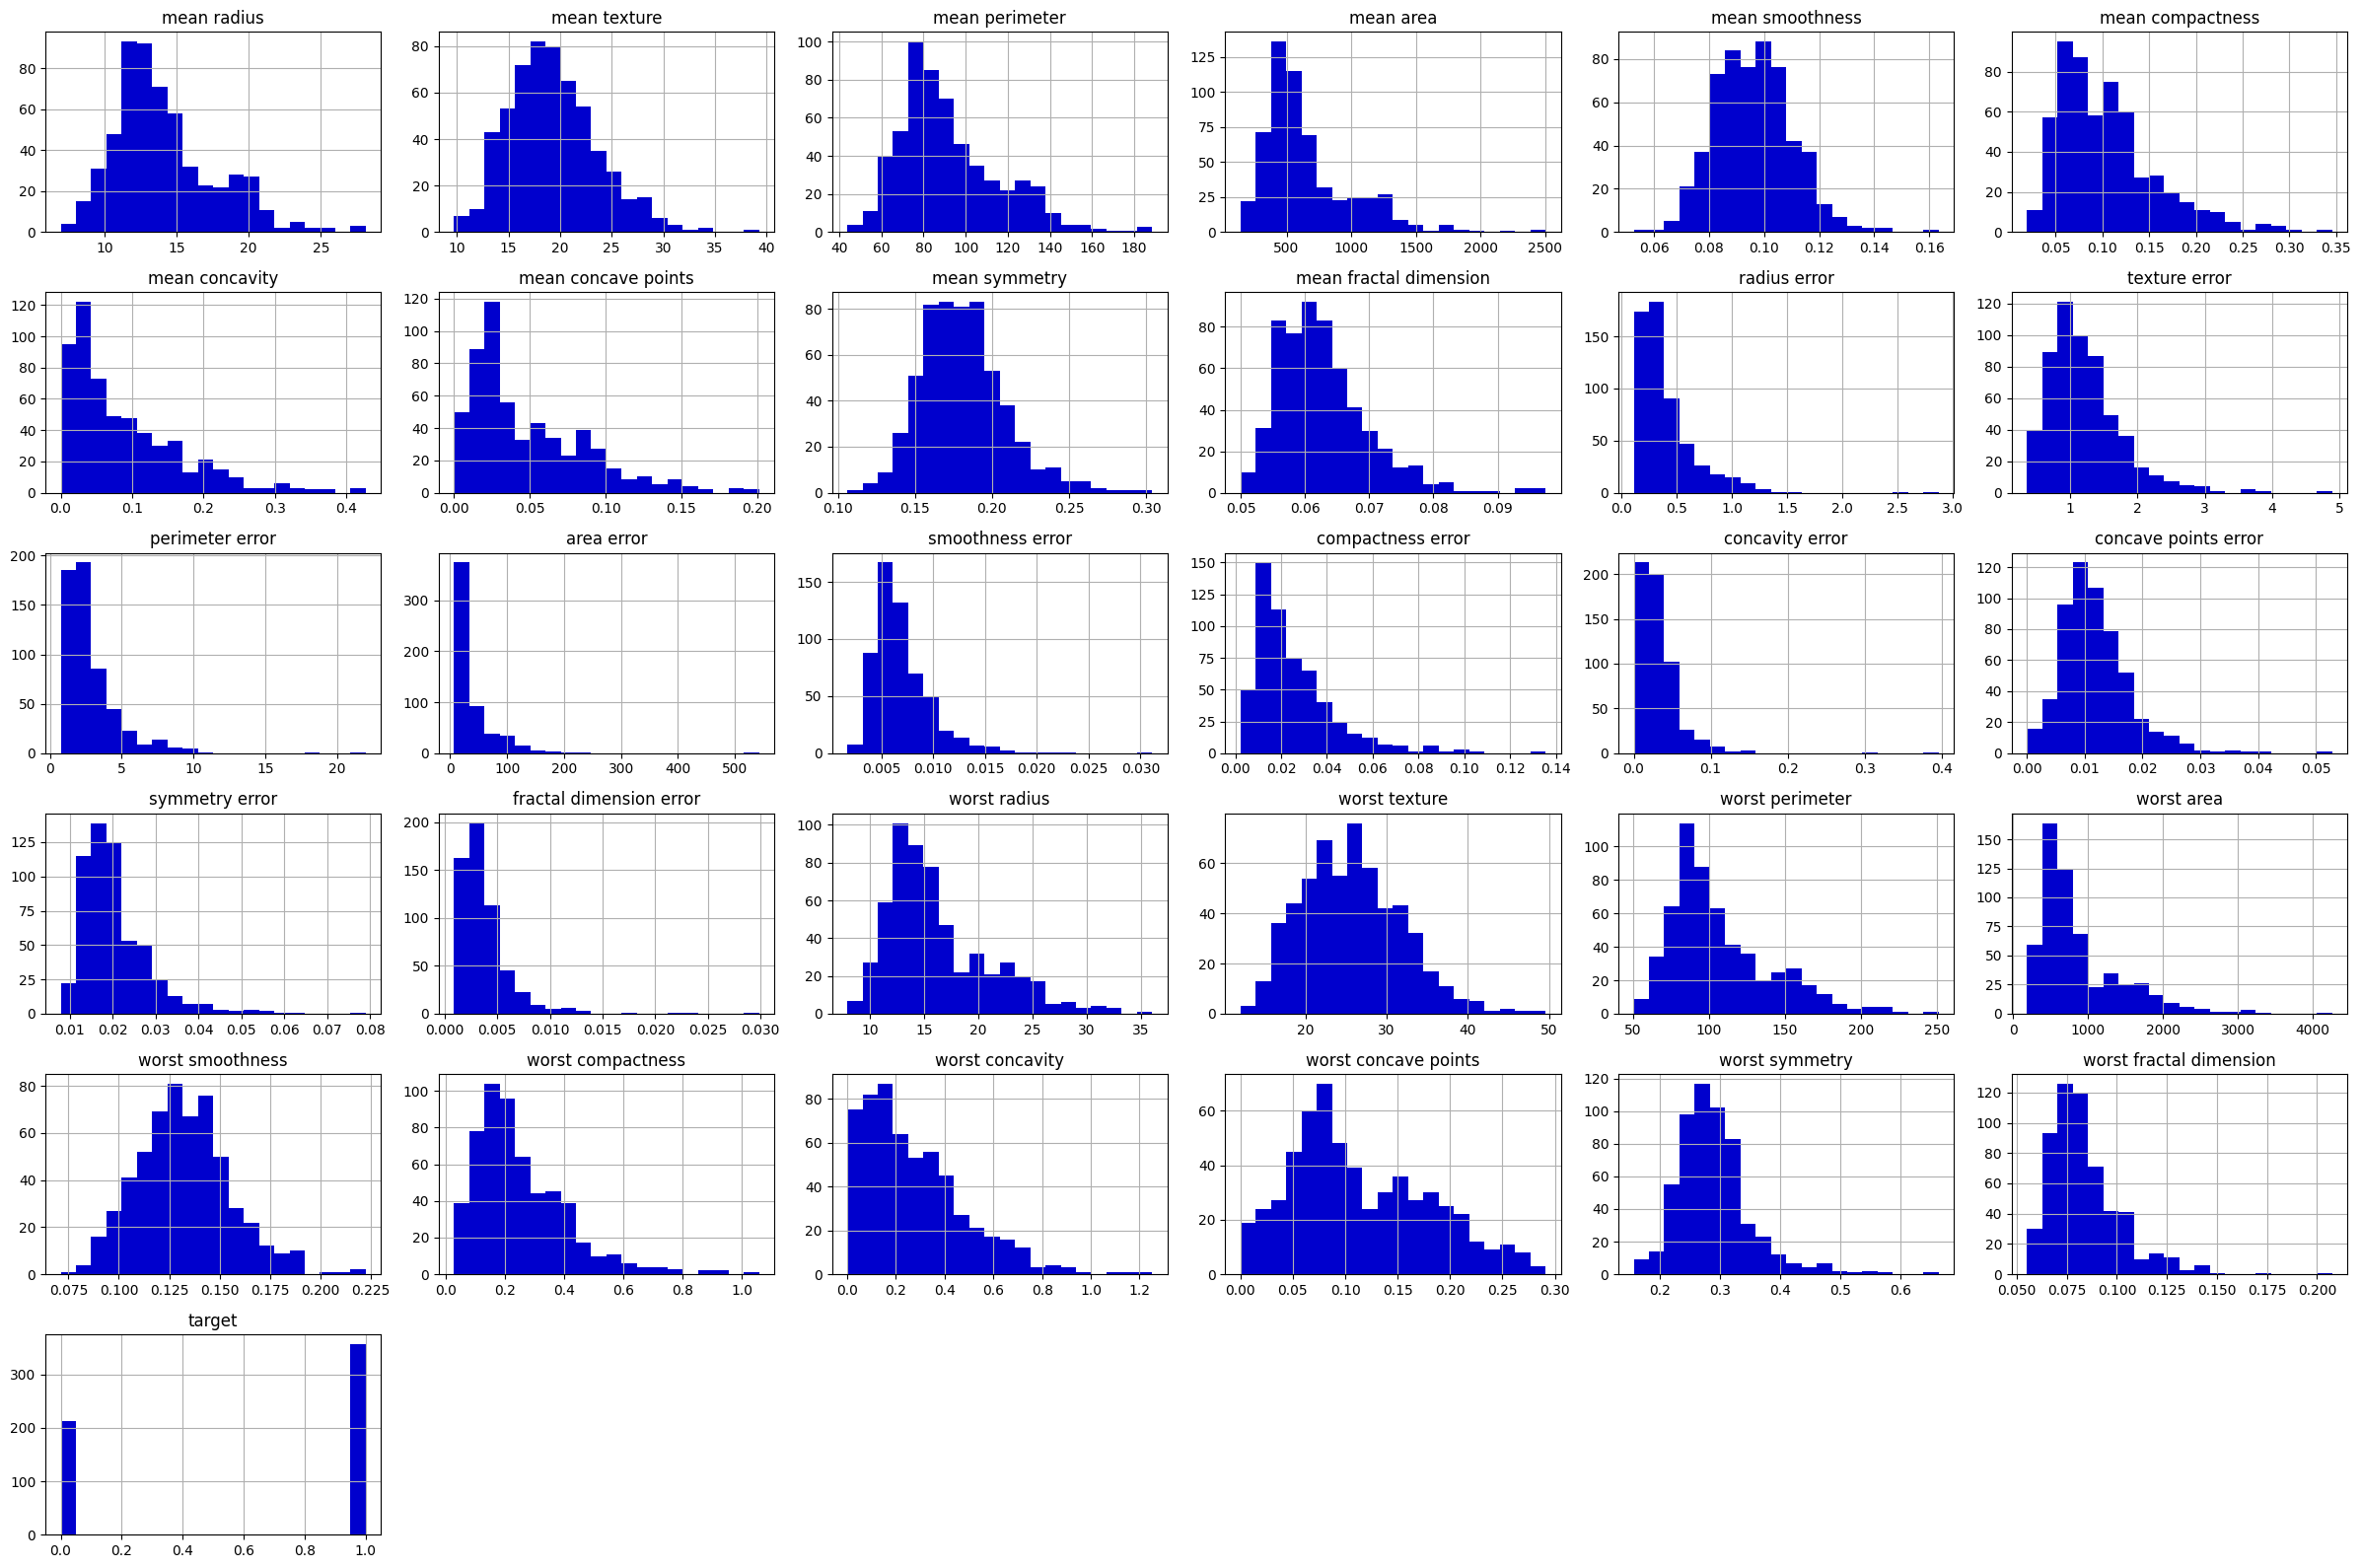

In [9]:
df.hist(bins=20, figsize=(24,16), color='mediumblue')
plt.tight_layout()
plt.show()

In [10]:
df.to_csv('data.csv', index=False)

##**Entrenamiento de un Modelo con Scikit-Learn**##



**División Train/Test.**

In [11]:
train, test = train_test_split(df, test_size=0.2)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

Dimensiones del dataset de training: (455, 31)
Dimensiones del dataset de test: (114, 31)


In [12]:
train_target = train['target']
train[['target']].to_csv('train-target.csv', index=False)
del train['target']
train.to_csv('train.csv', index=False)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de training: {train_target.shape}')

Dimensiones del dataset de training: (455, 30)
Dimensiones del dataset de training: (455,)


In [13]:
test_target = test['target']
test[['target']].to_csv('test-target.csv', index=False)
del test['target']
test.to_csv('test.csv', index=False)
print(f'Dimensiones del dataset de training: {test.shape}')
print(f'Dimensiones del dataset de training: {test_target.shape}')

Dimensiones del dataset de training: (114, 30)
Dimensiones del dataset de training: (114,)


In [14]:
features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train_target

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                            test_size=.20,
                                                            random_state=123,
                                                            stratify=y_raw)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 168 to 225
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 14  smoothness error         455 

In [16]:
train_target.info()

<class 'pandas.core.series.Series'>
Index: 455 entries, 168 to 225
Series name: target
Non-Null Count  Dtype
--------------  -----
455 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 560 to 146
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              114 non-null    float64
 1   mean texture             114 non-null    float64
 2   mean perimeter           114 non-null    float64
 3   mean area                114 non-null    float64
 4   mean smoothness          114 non-null    float64
 5   mean compactness         114 non-null    float64
 6   mean concavity           114 non-null    float64
 7   mean concave points      114 non-null    float64
 8   mean symmetry            114 non-null    float64
 9   mean fractal dimension   114 non-null    float64
 10  radius error             114 non-null    float64
 11  texture error            114 non-null    float64
 12  perimeter error          114 non-null    float64
 13  area error               114 non-null    float64
 14  smoothness error         114 

In [18]:
test_target.info()

<class 'pandas.core.series.Series'>
Index: 114 entries, 560 to 146
Series name: target
Non-Null Count  Dtype
--------------  -----
114 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


Análisis de la correlación

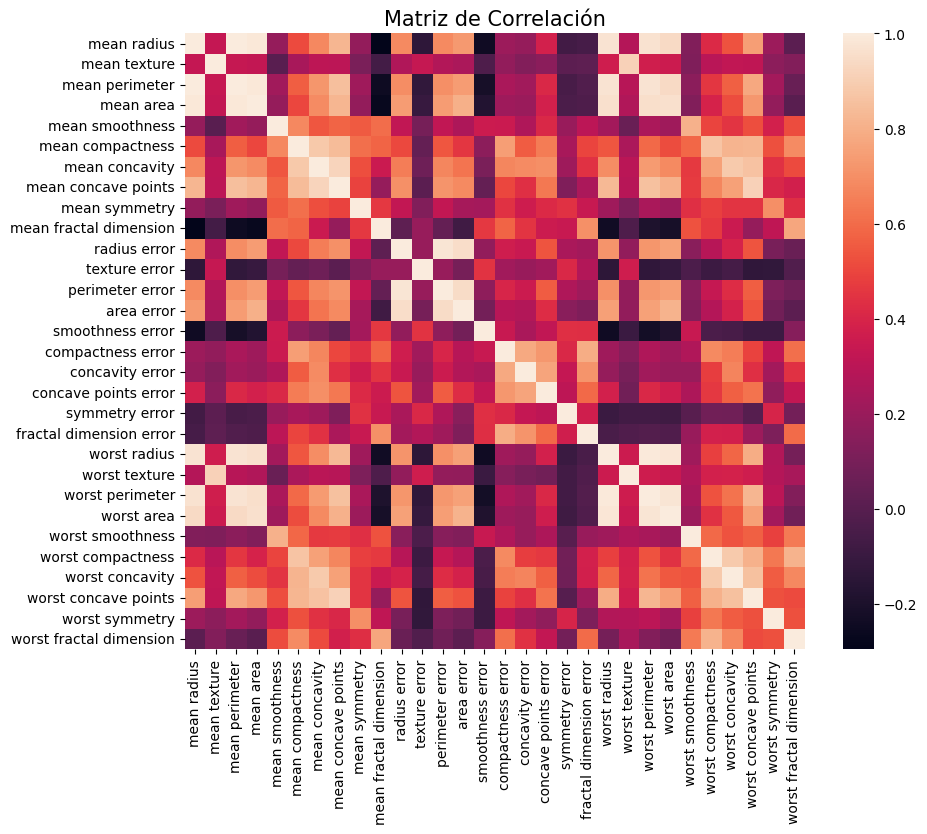

In [19]:
corr_matrix = train.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix)
plt.title('Matriz de Correlación', fontsize=15)
plt.show()

**Modelo RandomForestClassifier**

In [20]:
clf = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=2,
                            class_weight='balanced',
                            random_state=123)

preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

model_clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('randomforestclassifier', clf)])

In [21]:
model_clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2,
                                        random_state=123))])

In [22]:
y_train_pred = model_clf.predict(x_train)
y_test_pred = model_clf.predict(x_test)

accuracy_train = model_clf.score(x_train, y_train)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)

print("Métricas para el conjunto de train:")
print(f'accuracy_train: {accuracy_train}')
print(f"Precisión: {precision_train}")
print(f"Recuperación: {recall_train}")
print(f"Puntuación F1: {f1_train}")
print(f"AUC ROC: {roc_auc_train}")

Métricas para el conjunto de train:
accuracy_train: 1.0
Precisión: 1.0
Recuperación: 1.0
Puntuación F1: 1.0
AUC ROC: 1.0


In [23]:
accuracy_test = model_clf.score(x_test, y_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

print("\nMétricas para el conjunto de test:")
print(f'accuracy_test: {accuracy_test}')
print(f"Precisión: {precision_test}")
print(f"Recuperación: {recall_test}")
print(f"Puntuación F1: {f1_test}")
print(f"AUC ROC: {roc_auc_test}")


Métricas para el conjunto de test:
accuracy_test: 0.967032967032967
Precisión: 0.9661016949152542
Recuperación: 0.9827586206896551
Puntuación F1: 0.9743589743589743
AUC ROC: 0.9610762800417973


In [24]:
model_clf.get_params()

{'memory': None,
 'steps': [('preprocessor', Pipeline(steps=[('scaler', StandardScaler())])),
  ('randomforestclassifier',
   RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                          random_state=123))],
 'verbose': False,
 'preprocessor': Pipeline(steps=[('scaler', StandardScaler())]),
 'randomforestclassifier': RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                        random_state=123),
 'preprocessor__memory': None,
 'preprocessor__steps': [('scaler', StandardScaler())],
 'preprocessor__verbose': False,
 'preprocessor__scaler': StandardScaler(),
 'preprocessor__scaler__copy': True,
 'preprocessor__scaler__with_mean': True,
 'preprocessor__scaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': 'balanced',
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier

El modelo RandomForestClassifier parece ser bastante efectivo en la tarea de clasificación, con resultados sólidos tanto en el conjunto de train como en el de test. Sin embargo, hay un ligero indicio de sobreajuste.

Se realiza validación cruzada.

In [25]:
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Puntuaciones de validación cruzada:", scores)
print("Puntuación media de validación cruzada:", scores.mean())

Puntuaciones de validación cruzada: [0.94520548 0.98630137 0.98630137 0.97260274 0.95833333]
Puntuación media de validación cruzada: 0.9697488584474885


Ejecutar/acceder al servidor MLflow.

In [26]:
!pip install pyngrok

In [27]:
mlflow.set_experiment('Cancer Classifier with metrics')
with mlflow.start_run(run_name='Despliegue Clf'):
    mlflow.log_param('n_estimators', 2)
    mlflow.log_metric("accuracy_train", accuracy_train)
    mlflow.log_metric("precision_train", precision_train)
    mlflow.log_metric("recall_train", recall_train)
    mlflow.log_metric("f1_train", f1_train)
    mlflow.log_metric("roc_auc_train", roc_auc_train)
    mlflow.log_metric("accuracy_test", accuracy_test)
    mlflow.log_metric("precision_test", precision_test)
    mlflow.log_metric("recall_test", recall_test)
    mlflow.log_metric("f1_test", f1_test)
    mlflow.log_metric("roc_auc_test", roc_auc_test)

get_ipython().system_raw('mlflow ui --port 5000 &')

from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = '2ds8aDu72zRYPDbAW058nhCDfA3_4TG2YqPc5dYu5fNCR77NZ'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls=True)
print('El tracking UI:', ngrok_tunnel.public_url)

2024/04/06 08:15:42 INFO mlflow.tracking.fluent: Experiment with name 'Cancer Classifier with metrics' does not exist. Creating a new experiment.


El tracking UI: https://0857-34-72-87-123.ngrok-free.app


In [28]:
from mlflow.tracking import MlflowClient
client = MlflowClient()

In [29]:
model_name = 'model_clf'

In [30]:
with mlflow.start_run() as run:
    run_name = run.info.run_id
    model_uri = 'runs:/{run_id}/artifact_path'.format(run_id=run_name, artifact_path=model_name)

    mlflow.log_metrics({
        "accuracy_train": accuracy_train,
        "precision_train": precision_train,
        "recall_train": recall_train,
        "f1_train": f1_train,
        "roc_auc_train": roc_auc_train,
        "accuracy_test": accuracy_test,
        "precision_test": precision_test,
        "recall_test": recall_test,
        "f1_test": f1_test,
        "roc_auc_test": roc_auc_test
    })
    mlflow.sklearn.log_model(model_clf, model_name)

    model_details = mlflow.register_model(
        model_uri=model_uri,
        name=model_name
    )

2024/04/06 08:15:58 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpb0s9kwp4/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.2.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_clf'.
Created version '1' of model 'model_clf'.


In [31]:
model_version_infos = client.search_model_versions("name = '%s'" % model_name)

In [32]:
new_model_version = max([model_version_info.version for model_version_info in model_version_infos])

In [33]:
model_version_infos = client.search_model_versions("name = '%s'" % model_name)

In [34]:
new_model_version

1

In [35]:
from mlflow.entities.model_registry.model_version_status import ModelVersionStatus

def wait_model_transition(model_name, model_version, stage):
  client = MlflowClient()
  for _ in range(10):
    model_version_details = client.get_model_version(
        name=model_name,
        version=model_version,
        stage=stage,
    )
    break
  time.sleep(1)

In [36]:
from mlflow.tracking import MlflowClient
import time

def wait_model_transition(model_name, model_version, stage):
    client = MlflowClient()
    for _ in range(10):
        model_version_details = client.get_model_version(
            name=model_name,
            version=model_version,
        )
        current_stage = model_version_details.current_stage
        if current_stage == stage:
            print(f"Model version {model_version} is now in stage {stage}.")
            break
        else:
            print(f"Model version {model_version} is currently in stage {current_stage}. Waiting for transition...")
            time.sleep(5)

wait_model_transition(model_name, new_model_version, 'Staging')

Model version 1 is currently in stage None. Waiting for transition...
Model version 1 is currently in stage None. Waiting for transition...
Model version 1 is currently in stage None. Waiting for transition...
Model version 1 is currently in stage None. Waiting for transition...
Model version 1 is currently in stage None. Waiting for transition...
Model version 1 is currently in stage None. Waiting for transition...
Model version 1 is currently in stage None. Waiting for transition...
Model version 1 is currently in stage None. Waiting for transition...
Model version 1 is currently in stage None. Waiting for transition...
Model version 1 is currently in stage None. Waiting for transition...


In [37]:
client.update_model_version(
    name=model_name,
    version=new_model_version,
    description='This model is a random forest classifier for the breast cancer data'
)

<ModelVersion: aliases=[], creation_timestamp=1712391359085, current_stage='None', description='This model is a random forest classifier for the breast cancer data', last_updated_timestamp=1712391409313, name='model_clf', run_id='5799cf0d6f214703a6497b74a8e68f19', run_link=None, source='file:///content/mlruns/182383052803350962/5799cf0d6f214703a6497b74a8e68f19/artifacts/artifact_path', status='READY', status_message=None, tags={}, user_id=None, version=1>

Registro y despliegue de Modelo con MLflow.

In [38]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("my-experiment")

2024/04/06 08:16:49 INFO mlflow.tracking.fluent: Experiment with name 'my-experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/343224729403542026', creation_time=1712391409419, experiment_id='343224729403542026', last_update_time=1712391409419, lifecycle_stage='active', name='my-experiment', tags={}>

In [39]:
from mlflow.tracking import MlflowClient
client = MlflowClient()

In [40]:
model_name = "model_clf"

with mlflow.start_run() as run:
  run_num = run.info.run_id
  model_uri = "runs:/{run_id}/{artifact_path}".format(run_id=run_num, artifact_path=model_name)

  mlflow.log_metric('accuracy_train', accuracy_train)
  mlflow.sklearn.log_model(model_clf, model_name)
  #mlflow.sklearn.save_model(model, "clf-model")

  model_details = mlflow.register_model(
    model_uri=model_uri,
    name=model_name)

Registered model 'model_clf' already exists. Creating a new version of this model...
2024/04/06 08:16:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_clf, version 2
Created version '2' of model 'model_clf'.


In [41]:
model_version_infos = client.search_model_versions("name = '%s'" % model_name)
new_model_version = max([model_version_info.version for model_version_info in model_version_infos])

In [42]:
from mlflow.entities.model_registry.model_version_status import ModelVersionStatus

def wait_model_transition(model_name, model_version, stage):
  client = MlflowClient()
  for _ in range(10):
    model_version_details = client.get_model_version(
      name=model_name,
      version=model_version,
    )
    status = ModelVersionStatus.from_string(model_version_details.status)
    print("Model status: %s" % ModelVersionStatus.to_string(status))
    if status == ModelVersionStatus.READY:
      client.transition_model_version_stage(
          name=model_name,
          version=model_version,
          stage=stage,
        )
      break
    time.sleep(1)

In [43]:
try:
  wait_model_transition(model_name, int(new_model_version)-1, "None")
except:
  pass

wait_model_transition(model_name, new_model_version, "Staging")

Model status: READY
Model status: READY


<ipython-input-42-00287e974e80>:13: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.3/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


In [44]:
new_model_version

'2'

In [45]:
client.update_model_version(
  name=model_name,
  version=new_model_version,
  description="This model is a random forest classifier for the breast cancer dataset from sklearn."
)

<ModelVersion: aliases=[], creation_timestamp=1712391412015, current_stage='Staging', description=('This model is a random forest classifier for the breast cancer dataset from '
 'sklearn.'), last_updated_timestamp=1712391412202, name='model_clf', run_id='e0fa98f07679448498f3fa955510f9ff', run_link='', source='mlflow-artifacts:/343224729403542026/e0fa98f07679448498f3fa955510f9ff/artifacts/model_clf', status='READY', status_message='', tags={}, user_id='', version='2'>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
image_path_1 = '/content/drive/My Drive/1.png'
image_path_2 = '/content/drive/My Drive/2.png'

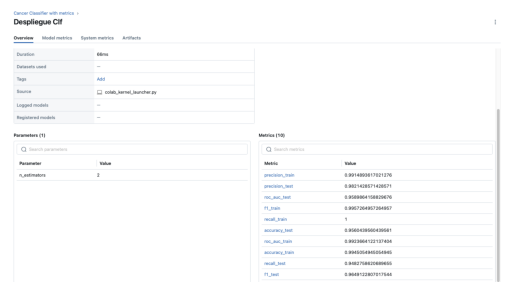

In [58]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread(image_path_1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

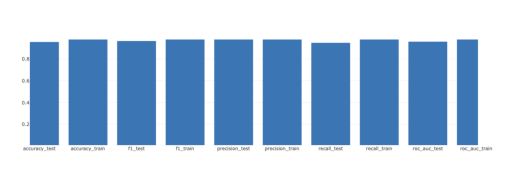

In [59]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread(image_path_2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()